## I will try to simulate a condition where the user has some field data that he wants to integrate into the WaPOR model calculations.

* I will comment with three hashes "###"
* original WaPOR script: https://github.com/wateraccounting/WAPORWP
* my email: mohammedalmak98@gmail.com

## Module 0 - In this jupyter notebook, WaPOR data needed for Water Productivity assessment will be  downloaded in bulk and corrected to the right unit
* Step 0a - Import modules/libraries
* Step 0b - Read geographical extent of the study area
* Step 0c - Bulk-download WaPOR data for the study area extent  
\### Only one season data will be downloaded

**=====================================================================================================================**
**Data layers for Water Productivity assessment:**

| No.  | WaPOR Data | Spatial resolution | Temporal resolution | Temporal coverage |
| :-: | :-: | :-: | :-: | :-: |
| 1 |Actual Evapotranspiration & interception (AETI)  | 100 m | Dekadal | 2009-2019 |
| 2  | Transpiration (T)  | 100 m | Dekadal  | 2009-2019 |
| 3  | Net Primary Production (NPP) | 100 m | Dekadal | 2009-2019 |
| 4  | Land cover classification (LCC)  | 100 m | Annual | 2009-2019 |
| 5  | Precipitation (PCP)  | 5 km | Dekadal | 2009-2019 |
| 6  | Reference Evapotranspiration (RET) | 20 km | Dekadal  | 2009-2019 |

**=====================================================================================================================**

## 1 Import modules/libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyshp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 2.7 MB/s eta 0:00:00


In [ ]:
import os                     # module for interacting with the operating system
import shapefile             # module foe reading shapefile
import matplotlib.pyplot as plt # module for plotting
import sys

sys.path.insert(0,'/content/drive/My Drive/WAPORWP/Modules')
# sys.path.append(folder) #add folder with local modules to system paths  #change working directory to 'Modules' folder
import WaPOR                  # Import local module in 'Modules' folderfrom osgeo import ogr,

Obtained saved API Token
Your WaPOR API Token is saved into: /content/drive/My Drive/WAPORWP/Modules/WaPOR/wapor_api_token.pickle. 
 If you wish to change your API Token, please delete this file


**Get WaPOR API Token: https://wapor.apps.fao.org/profile**
![title](https://github.com/wateraccounting/WAPORWP/blob/master/Notebooks/img/Fig0.gif?raw=true)

## 2 Read geographical extent of the study area

**Study area: Xinavane, Mozambique**

In [ ]:
roi_shapefile=r"/content/drive/My Drive/WAPORWP/Data/1Boundary/Shapefile/Xinavane_1.shp" #path to the shapefile of study area
shape=shapefile.Reader(roi_shapefile) #read shapefile
xmin,ymin,xmax,ymax=shape.bbox #read shapefile extent
print('Extent of study area: lonlim = [{0},{2}], latlim = [{1},{3}]'.format(xmin,ymin,xmax,ymax))

Extent of study area: lonlim = [32.65692516077674,32.90420244933813], latlim = [-25.16412729789142,-25.01450956754679]


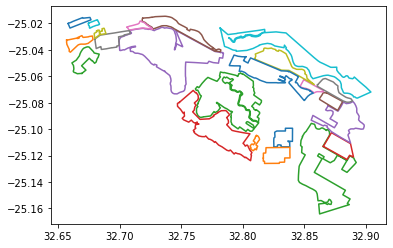

In [ ]:
##plot to check shapefile
plt.figure()
sf=shape
for shape in sf.shapeRecords(): #loop over all features in shapefile
    for i in range(len(shape.shape.parts)): #loop over all points in feature
        i_start = shape.shape.parts[i]
        if i==len(shape.shape.parts)-1:
            i_end = len(shape.shape.points)
        else:
            i_end = shape.shape.parts[i+1]
        x = [i[0] for i in shape.shape.points[i_start:i_end]]
        y = [i[1] for i in shape.shape.points[i_start:i_end]]
        plt.plot(x,y)
plt.show()

## 3 Bulk-download WaPOR data for the study area extent

In [ ]:
output_dir=r'/content/drive/My Drive/WAPORWP/Data' # folder to save data

## Land cover classification (Annual)

In [ ]:
WaPOR.download_yearly(output_dir, 
                       data='LCC',
                       Startdate='2016-09-01',
                       Enddate='2017-11-01',
                       latlim=[ymin-0.001, ymax+0.001], 
                       lonlim=[xmin-0.001, xmax+0.001],
                       level=2, 
                       )


Download WaPOR Level 2 yearly LCC data for the period 2016-09-01 till 2017-11-01
Loading WaPOR catalog from cached file: /content/drive/My Drive/WAPORWP/Modules/WaPOR/catalog_2.pickle
Cached WaPOR catalog has been loaded.
If you wish to update catalog from WaPOR server, run this line:
WaPOR.API.getCatalog(cached=False)
Progress: |██████████████████████████████████████████████████| 100.0% Complete


'/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_yearly_L2_LCC_A'

## Reference Evapotranspiration (Dekadal)

In [ ]:
WaPOR.download_dekadal(output_dir, 
                       data='RET',
                       Startdate='2016-09-01',
                       Enddate='2017-11-01',
                       latlim=[ymin-0.25, ymax+0.25], 
                       lonlim=[xmin-0.25, xmax+0.25],
                       level=1, 
                       )


Download WaPOR Level 1 dekadal RET data for the period 2016-09-01 till 2017-11-01
Loading WaPOR catalog from cached file: /content/drive/My Drive/WAPORWP/Modules/WaPOR/catalog_2.pickle
Cached WaPOR catalog has been loaded.
If you wish to update catalog from WaPOR server, run this line:
WaPOR.API.getCatalog(cached=False)
Progress: |██████████████████████████████████████████████████| 100.0% Complete


'/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L1_RET_D'

## Precipitation (Dekadal) 

In [ ]:
WaPOR.download_dekadal(output_dir, 
                       data='PCP',
                       Startdate='2016-09-01',
                       Enddate='2017-11-01',
                       latlim=[ymin-0.05, ymax+0.05], 
                       lonlim=[xmin-0.05, xmax+0.05],
                       level=1, 
                       )


Download WaPOR Level 1 dekadal PCP data for the period 2016-09-01 till 2017-11-01
Loading WaPOR catalog from cached file: /content/drive/My Drive/WAPORWP/Modules/WaPOR/catalog_2.pickle
Cached WaPOR catalog has been loaded.
If you wish to update catalog from WaPOR server, run this line:
WaPOR.API.getCatalog(cached=False)
Progress: |██████████████████████████████████████████████████| 100.0% Complete


'/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L1_PCP_D'

## Actual evapotranspiration & interception (Dekadal)

In [ ]:
WaPOR.download_dekadal(output_dir, 
                       data='AETI',
                       Startdate='2016-09-01',
                       Enddate='2017-11-01',
                       latlim=[ymin-0.001, ymax+0.001], 
                       lonlim=[xmin-0.001, xmax+0.001],
                       level=2, 
                       )


Download WaPOR Level 2 dekadal AETI data for the period 2016-09-01 till 2017-11-01
Loading WaPOR catalog from cached file: /content/drive/My Drive/WAPORWP/Modules/WaPOR/catalog_2.pickle
Cached WaPOR catalog has been loaded.
If you wish to update catalog from WaPOR server, run this line:
WaPOR.API.getCatalog(cached=False)
Progress: |██████████████████████████████████████████████████| 100.0% Complete


'/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L2_AETI_D'

## Transpiration (Dekadal)

In [ ]:
WaPOR.download_dekadal(output_dir, 
                       data='T',
                       Startdate='2016-09-01',
                       Enddate='2017-11-01',
                       latlim=[ymin-0.001, ymax+0.001], 
                       lonlim=[xmin-0.001, xmax+0.001],
                       level=2, 
                       )


Download WaPOR Level 2 dekadal T data for the period 2016-09-01 till 2017-11-01
Loading WaPOR catalog from cached file: /content/drive/My Drive/WAPORWP/Modules/WaPOR/catalog_2.pickle
Cached WaPOR catalog has been loaded.
If you wish to update catalog from WaPOR server, run this line:
WaPOR.API.getCatalog(cached=False)
Progress: |██████████████████████████████████████████████████| 100.0% Complete


'/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L2_T_D'

## Net Primary Production (Dekadal)

In [ ]:
WaPOR.download_dekadal(output_dir, 
                       data='NPP',
                       Startdate='2016-09-01',
                       Enddate='2017-11-01',
                       latlim=[ymin-0.001, ymax+0.001], 
                       lonlim=[xmin-0.001, xmax+0.001],
                       level=2, 
                       )


Download WaPOR Level 2 dekadal NPP data for the period 2016-09-01 till 2017-11-01
Loading WaPOR catalog from cached file: /content/drive/My Drive/WAPORWP/Modules/WaPOR/catalog_2.pickle
Cached WaPOR catalog has been loaded.
If you wish to update catalog from WaPOR server, run this line:
WaPOR.API.getCatalog(cached=False)
Progress: |██████████████████████████████████████████████████| 100.0% Complete


'/content/drive/My Drive/WAPORWP/Data/WAPOR.v2_dekadal_L2_NPP_D'